# Avaliando Modelos de Machine Learning em Scikit-Learn

## Revisão

- Tarefa de Classificação: Prever a espécie de uma iris desconhecida
- Utilizados três modelos de classificação: **KNN(K=1)**, **KNN(K=5)**, **logistic regression**
- Necessária uma maneira de escolher entre os modelos

**Solução:** Procedimentos de avalição de modelos

## Procedimento 1: Treinar e testar em todo o conjunto de dados

1. Treinar o modelo no conjunto de dados inteiro
2. Testar o modelo no mesmo conjunto de dados e avaliar quão bem nos saímos ao compararmos os **valores da previsão** com os **valores verdadeiros**

In [1]:
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
iris = load_iris()

# Cria X (features) e y (resposta)
X = iris.data
y = iris.target

## Logistic Regression

In [14]:
# importamos a classe
from sklearn.linear_model import LogisticRegression

# instanciamos o modelo (utilizando parâmetros padrão)
logreg = LogisticRegression()

# ajustamos o modelo com os dados
logreg.fit(X, y)

# Prevê os valores de resposta para as observações em X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
# Guardamos os valores de resposta previstos
y_pred = logreg.predict(X)

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [16]:
len(y_pred) # Checamos quantas previsões foram feitas

150

## Acurácia de Classificação

- Proporção de previsões corretas
- **Métricas de avaliações** comuns para problemas de classificação

In [18]:
# Computa a acurácia de classificação para o modelo de Logistic Regression

from sklearn import metrics
print(metrics.accuracy_score(y, y_pred)) # 96% das previsões foram corretas

0.96


- Conhecido como **acuŕacia de treinamento**, quando treinamos e testamos o modelo com os mesmos dados

## KNN (K=5)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


## KNN (K=1)

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


## Problemas em treinar e testar com os mesmos dados

- Objetivo é estimar a perfomance do modelo com **dados fora de amostra**
- Porém, maximizar a acurácia nos recompensa com **modelos excessivamente complexos** que não irão necessariamente generalizar
- Modelos desnecessariamente complexos causam **overfit** nos dados de treinamento

## Procedimento 2: Dividir em Treinamento/Teste

1. Dividir o conjunto de dados em dois pedaços: um conjunto de treinamento e um conjunto de testes
2. Treinar o modelo no conjunto de treinamento
3. Testar o modelo no conjunto de testes e avaliar quão bem ele se saiu

In [21]:
print(X.shape, y.shape)

(150, 4) (150,)


In [24]:
# Passo 1: dividir X e y em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

![img](https://raw.githubusercontent.com/the-akira/DataScience/master/imagens/TrainTest.png)

O que realizamos?

- Modelo pode ser treinado e testado em dados diferentes
- Valores de resposta são conhecidos para o conjunto de treinamento, e, sendo assim, **previsões podem ser avaliadas**
- **Acurácia de Teste** é um estimador melhor do que perfomance de Acurácia de Treinamento para dados fora de amostra

In [25]:
# Vamos conferir a forma do novo objeto X
print(X_train.shape, X_test.shape)

(90, 4) (60, 4)


In [26]:
# Vamos conferir a forma do novo objeto y
print(y_train.shape, y_test.shape)

(90,) (60,)


In [27]:
# Passo 2: Treinar o modelo no conjunto de treinamento
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
# Passo 3: Fazer previsões no conjunto de testes

y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


## Repetir para KNN com K=5

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


## Repetir para KNN com K=1

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


Será possível encontrar um valor melhor para K?

In [43]:
# Tentar K=1 até K=25 e registrar a acurácia de teste
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Acurácia de Teste')

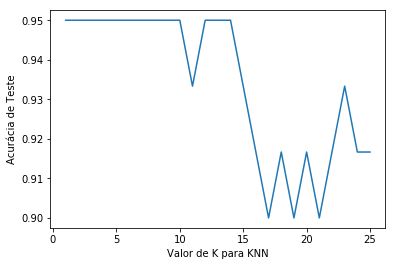

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Acurácia de Teste')

- Acuŕacia de Treinamento cresce ao aumentar a complexidade do modelo
- Acurácia de Teste penaliza modelos que são muito complexos or pouco complexos
- Para modelos KNN, complexidade é determinada pelo **valor de K** (valor menor = mais complexo)

# Fazendo previsões em dados fora de amostra

In [45]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X, y)

knn.predict([[3,5,4,2]])

array([1])